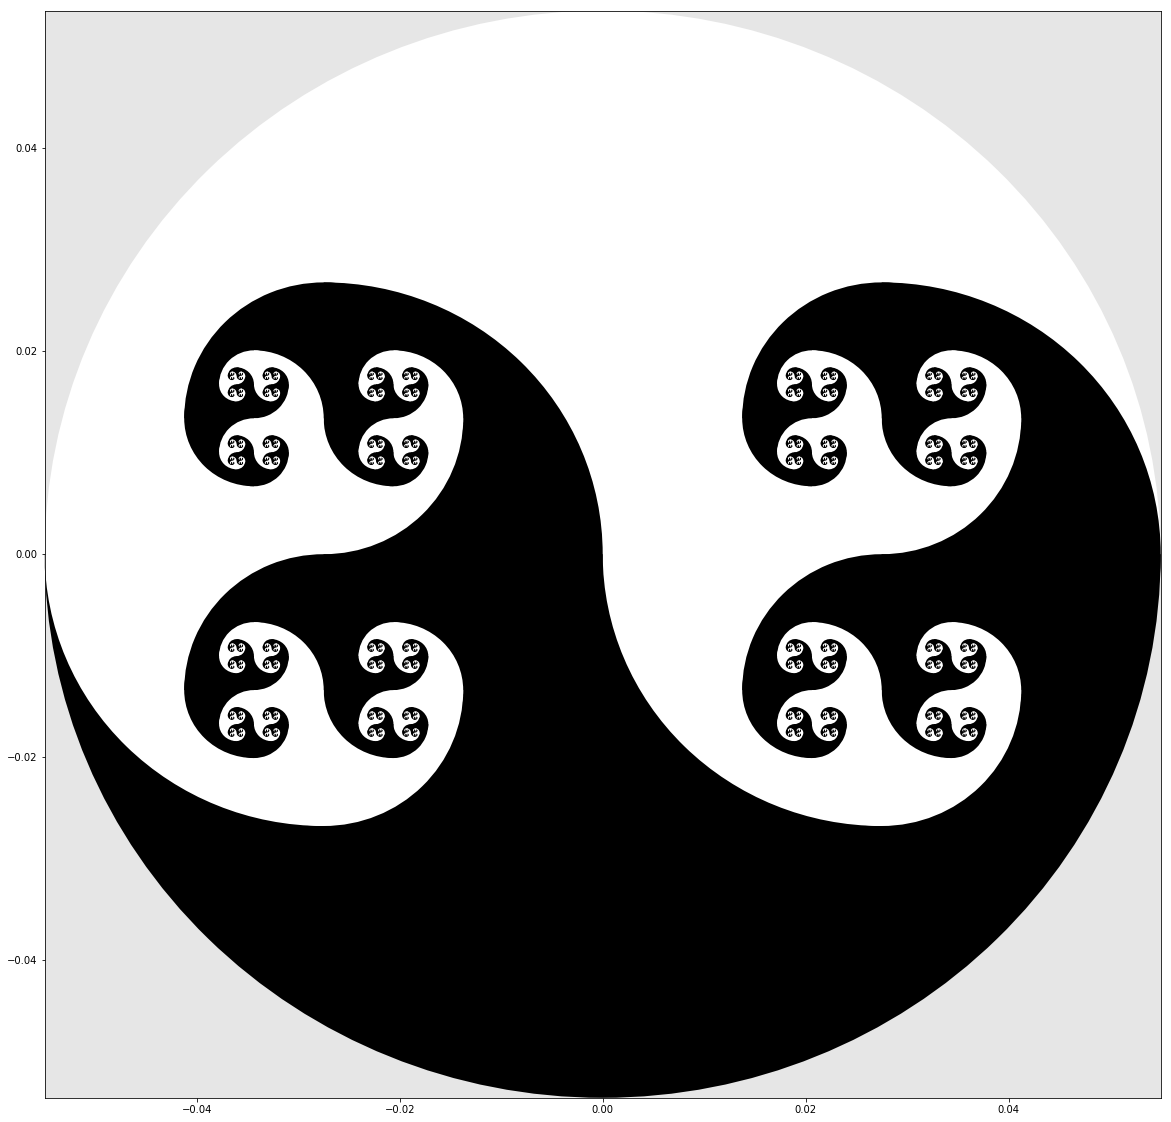

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

def main():
    fig, ax = plt.subplots()
    fractal(10, ax)
    ax.axis('equal')
    ax.set_facecolor((0.9,)*3)
    fig.set_size_inches(20,20) 
    plt.show()
    
def fractal(n, ax):
    centers = [np.array([.5,.5])]
    radius = 0.5
    for i in range(n):
        new_centers = []
        p = i % 2
        angle = 90 * i
        for center in centers:
            dual_half_circle(center=center,radius=radius, angle=angle, ax=ax)
            delta = np.array([0.,0.])
            delta[p] = radius / 2
            new_cs =  [center + delta, center - delta]
            new_centers += [center + delta, center - delta]
            #print i, p, center, radius, delta, new_cs, radius / 2.,  delta[p] == radius / 2.
        radius /= 2
        centers = copy.copy(new_centers)
        

def dual_half_circle(
     center, radius, angle=0, ax=None, colors=('w','k'), **kwargs):
    if ax is None:
        ax = plt.gca()
    kwargs.update(transform=ax.transAxes, clip_on=False)
    theta1, theta2 = angle, angle + 180
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    for wedge in [w1, w2]:
        ax.add_artist(wedge)
    return [w1, w2]

main()